# Лабораторная работа 2: Кластеризация данных

Студент: Горщенко Д. В.  
Вариант: 3

**Цель:** научиться применять модели кластеризации библиотеки scikit-learn к набору эмпирических данных

**Задачи:**
1. Загрузить данные из файла (использовать библиотеку Pandas).
2. Визуализировать загруженные данные (диаграмма рассеяния).
3. Оценить число групп (кластеров).
4. Выбрать модель кластеризации.
5. Обучить модель кластеризации на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.

### 1. Импорт необходимых библиотек

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

### 2. Загрузка данных из Excel-файла

In [32]:
df = pd.read_excel('lab2-03.xlsx')
display(df.head())

,0,1
0,-4.526108,-3.231157
1,-2.346786,-4.658288
2,-1.722481,-2.705625
3,10.310193,-3.924825
4,-9.949807,-4.761994


### 3. Визуализация исходных данных

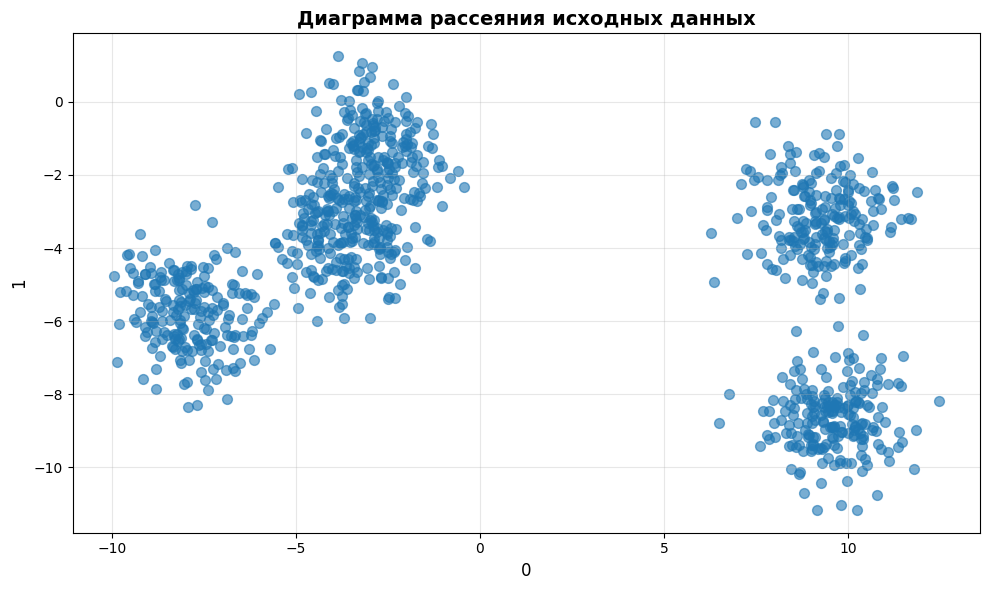

In [33]:

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], alpha=0.6, s=50)
plt.xlabel(df.columns[0], fontsize=12)
plt.ylabel(df.columns[1], fontsize=12)
plt.title('Диаграмма рассеяния исходных данных', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4. Оценка числа групп

Визуально их 4

### 5. Нормализация данных

In [34]:
df_clean = df.dropna()
numeric_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
X = df_clean[numeric_features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Среднее после нормализации: {X_scaled.mean(axis=0)}")
print(f"Стандартное отклонение после нормализации: {X_scaled.std(axis=0)}")

Среднее после нормализации: [ 1.24344979e-17 -1.95399252e-16]
Стандартное отклонение после нормализации: [1. 1.]


### 6. Разделение данных на обучающую и тестовую выборки

In [35]:

X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (800, 2)
Размер тестовой выборки: (200, 2)


### 8. Обучение модели KMeans

In [36]:
k=4

kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_model.fit(X_train)

train_clusters = kmeans_model.predict(X_train)
test_clusters = kmeans_model.predict(X_test)

print(f"Модель KMeans обучена с {k} кластерами")
print(f"\nЦентры кластеров:")
print(kmeans_model.cluster_centers_)

Модель KMeans обучена с 4 кластерами

Центры кластеров:
[[ 1.20262708 -1.53560779]
 [-1.05734005 -0.35898889]
 [ 1.15683148  0.56442989]
 [-0.56411616  0.92904801]]


### 9. Оценка качества модели

In [ ]:
train_silhouette = silhouette_score(X_train, train_clusters)
train_davies_bouldin = davies_bouldin_score(X_train, train_clusters)
train_calinski = calinski_harabasz_score(X_train, train_clusters)

test_silhouette = silhouette_score(X_test, test_clusters)
test_davies_bouldin = davies_bouldin_score(X_test, test_clusters)
test_calinski = calinski_harabasz_score(X_test, test_clusters)

print("=" * 60)
print("МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ")
print("=" * 60)
print("\nОбучающая выборка:")
print(f"  Silhouette Score: {train_silhouette:.3f}")
print(f"  Davies-Bouldin Index: {train_davies_bouldin:.3f}")
print(f"  Calinski-Harabasz Index: {train_calinski:.3f}")

print("\nТестовая выборка:")
print(f"  Silhouette Score: {test_silhouette:.3f}")
print(f"  Davies-Bouldin Index: {test_davies_bouldin:.3f}")
print(f"  Calinski-Harabasz Index: {test_calinski:.3f}")
print("=" * 60)

print("\nРаспределение объектов по кластерам:")
print("Обучающая выборка:", np.bincount(train_clusters))
print("Тестовая выборка:", np.bincount(test_clusters))

МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ

Обучающая выборка:
  Silhouette Score: 0.633
  Davies-Bouldin Index: 0.495
  Calinski-Harabasz Index: 2470.844

Тестовая выборка:
  Silhouette Score: 0.648
  Davies-Bouldin Index: 0.466
  Calinski-Harabasz Index: 709.436

Распределение объектов по кластерам:
Обучающая выборка: [158 219 157 266]
Тестовая выборка: [42 52 43 63]


### 10. Визуализация результатов кластеризации

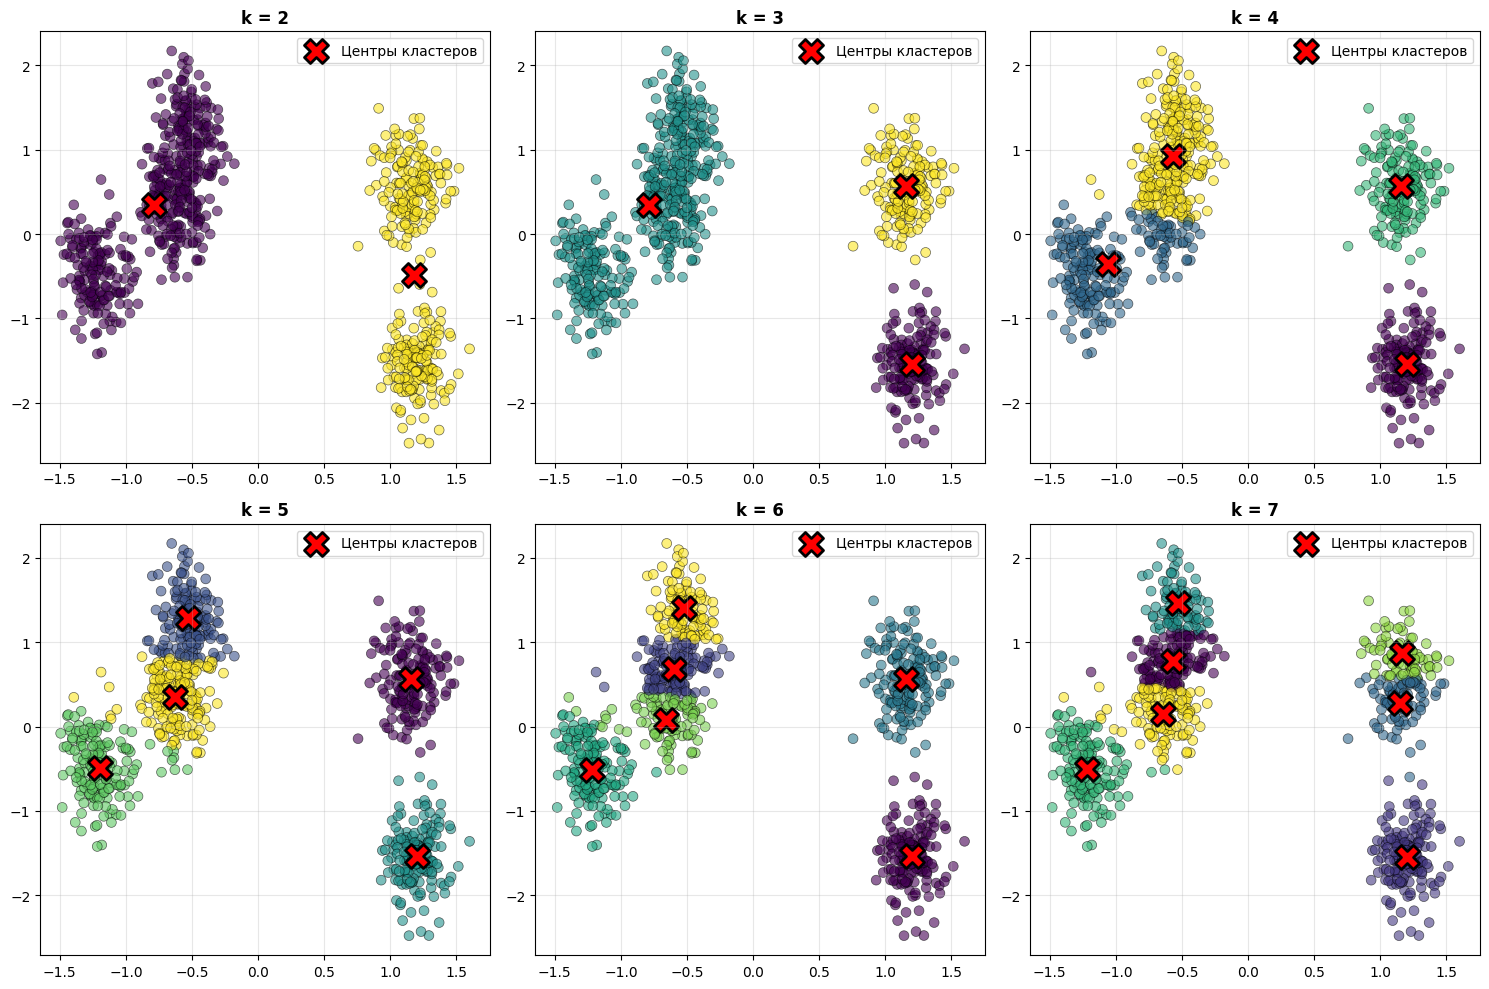

In [38]:
k_values = [2, 3, 4, 5, 6, 7]

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_train)
    
    plt.subplot(2, 3, i)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], 
                c=labels, cmap='viridis', 
                s=50, alpha=0.6, edgecolors='k', linewidth=0.5)
    
    plt.scatter(model.cluster_centers_[:, 0],
                model.cluster_centers_[:, 1],
                c='red', marker='X', s=300, 
                edgecolors='black', linewidth=2,
                label='Центры кластеров')
    
    plt.title(f'k = {k}', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()